In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import pycountry
from scipy import stats
from scipy.signal import savgol_filter

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Funciones de formato para ejes
def formato_millones(x, pos):
    return f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}k'

def formato_miles_millones(x, pos):
    return f'{x/1e9:.1f}B' if x >= 1e9 else f'{x/1e6:.1f}M'

# Función para convertir códigos ISO2 a ISO3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

In [2]:
# Cargar datos de emisiones de CO₂ desde EDGAR
edgar_path = '../../data/fuentes/climaticos/EDGAR_2024_GHG_booklet_2024.xlsx'
df_co2 = pd.read_excel(edgar_path, sheet_name='GHG_totals_by_country')

# Mostrar las primeras filas y la información del dataset
print("Dataset de emisiones de CO₂ (EDGAR):")
print(f"Dimensiones: {df_co2.shape}")
print("\nPrimeras filas:")
display(df_co2.head())
print("\nInformación del dataset:")
display(df_co2.info())
print("\nColumnas disponibles:")
display(df_co2.columns.tolist())

Dataset de emisiones de CO₂ (EDGAR):
Dimensiones: (214, 56)

Primeras filas:


,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,Aruba,0.036713,0.041538,0.052391,0.057360,0.056630,0.070743,0.069793,0.080624,...,0.469468,0.490990,0.514539,0.496141,0.495532,0.588998,0.482160,0.531202,0.533603,0.561498
1,AFG,Afghanistan,15.437430,15.364077,13.316628,13.934875,15.177862,15.843058,15.943325,16.088215,...,27.420132,27.408332,26.633999,27.691927,27.553282,26.982777,26.646320,27.643074,28.614071,29.460052
2,AGO,Angola,18.998763,18.866057,21.459002,23.018941,23.685423,22.519608,18.586243,23.251029,...,77.295699,81.775031,78.875889,73.424409,69.504638,69.910832,61.680081,64.408994,67.210842,67.700756
3,AIA,Anguilla,0.003355,0.003396,0.003534,0.003411,0.003694,0.003968,0.003833,0.003960,...,0.031210,0.031334,0.031728,0.032476,0.031594,0.030948,0.026037,0.025224,0.025068,0.026211
4,AIR,International Aviation,172.478021,172.465452,182.459819,190.296910,183.162104,177.165836,177.483077,193.593366,...,514.263976,543.354255,567.631287,597.771580,624.135612,633.464502,302.632337,335.728729,416.953422,498.178114



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EDGAR Country Code  212 non-null    object 
 1   Country             212 non-null    object 
 2   1970                212 non-null    float64
 3   1971                212 non-null    float64
 4   1972                212 non-null    float64
 5   1973                212 non-null    float64
 6   1974                212 non-null    float64
 7   1975                212 non-null    float64
 8   1976                212 non-null    float64
 9   1977                212 non-null    float64
 10  1978                212 non-null    float64
 11  1979                212 non-null    float64
 12  1980                212 non-null    float64
 13  1981                212 non-null    float64
 14  1982                212 non-null    float64
 15  1983                212 non-nul

None


Columnas disponibles:


['EDGAR Country Code',
 'Country',
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

NULOS CO2

Filas completamente vacías encontradas:
    EDGAR Country Code Country
210                NaN     NaN
212                NaN     NaN

Nulos por año (dataset limpio):
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
dtype: int64


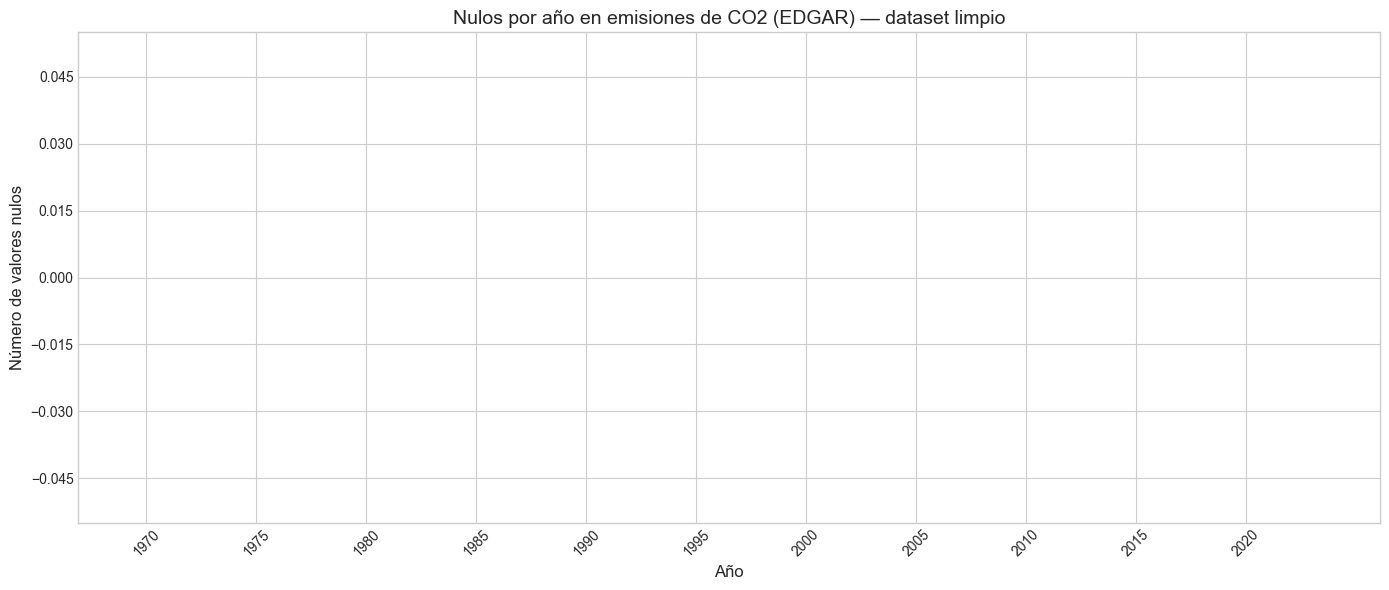

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# ==========================
# 1) Cargar dataset
# ==========================
edgar_path = '../../data/fuentes/climaticos/EDGAR_2024_GHG_booklet_2024.xlsx'
df_co2 = pd.read_excel(edgar_path, sheet_name='GHG_totals_by_country')

# ==========================
# 2) Identificar columnas de años (enteros)
# ==========================
year_cols = [c for c in df_co2.columns if isinstance(c, int)]

# ==========================
# 3) Detectar filas completamente vacías en las columnas de años
# ==========================
mask_all_empty = df_co2[year_cols].isna().all(axis=1)
filas_vacias = df_co2.loc[mask_all_empty, ['EDGAR Country Code', 'Country']]
print("Filas completamente vacías encontradas:")
print(filas_vacias)

# ==========================
# 4) Eliminar esas filas y crear df limpio
# ==========================
df_co2_clean = df_co2.loc[~mask_all_empty].reset_index(drop=True)

# ==========================
# 5) Recalcular nulos por año con el dataset limpio
# ==========================
nulos_por_anio = df_co2_clean[year_cols].isna().sum()
print("\nNulos por año (dataset limpio):")
print(nulos_por_anio)

# ==========================
# 6) Graficar nulos por año
# ==========================
plt.figure(figsize=(14,6))
plt.bar(nulos_por_anio.index.astype(str), nulos_por_anio.values)

# Eje X: solo cada 5 años
plt.xticks(nulos_por_anio.index.astype(str)[::5], rotation=45)

# Eje Y: solo enteros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.title("Nulos por año en emisiones de CO2 (EDGAR) — dataset limpio")
plt.xlabel("Año")
plt.ylabel("Número de valores nulos")
plt.tight_layout()
plt.show()


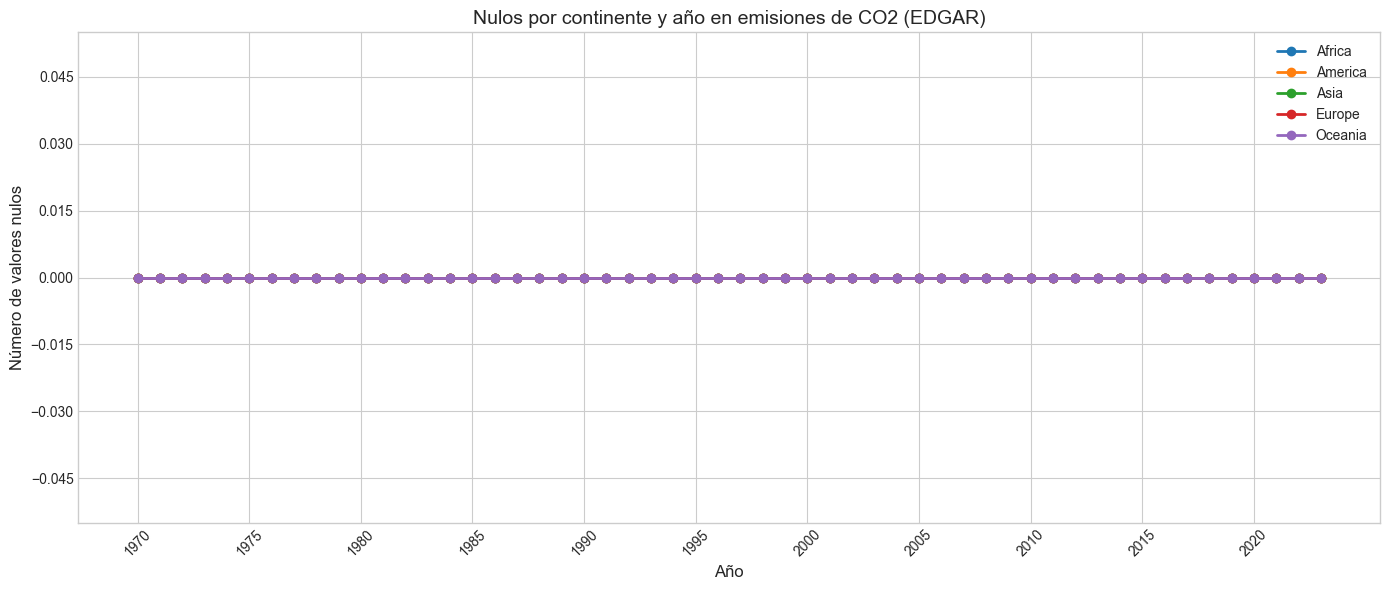

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import pycountry_convert as pc
from matplotlib.ticker import MaxNLocator

# ==========================
# 1. Cargar dataset de emisiones CO₂ (EDGAR)
# ==========================
edgar_path = '../../data/fuentes/climaticos/EDGAR_2024_GHG_booklet_2024.xlsx'
df_co2 = pd.read_excel(edgar_path, sheet_name='GHG_totals_by_country')

# ==========================
# 2. Identificar columnas de años
# ==========================
year_cols_co2 = [col for col in df_co2.columns if isinstance(col, int)]

# ==========================
# 3. Función para mapear país a continente (incluye Antártida)
# ==========================
def country_to_continent(country_name):
    # Caso especial: Antártida
    if str(country_name).strip().lower() in ["antarctica", "antártida"]:
        return "Antarctica"
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent = pc.convert_continent_code_to_continent_name(continent_code)
        # Unir Norte y Sudamérica como "América"
        if continent in ["North America", "South America"]:
            return "America"
        return continent
    except:
        return None  # descartar si no se encuentra

# ==========================
# 4. Agregar columna de continente
# ==========================
df_co2["Continent"] = df_co2["Country"].apply(country_to_continent)

# Quitar filas sin continente reconocido
df_co2 = df_co2.dropna(subset=["Continent"])

# ==========================
# 5. Calcular nulos por continente y año
# ==========================
nulos_continente_anio_co2 = (
    df_co2.groupby("Continent")[year_cols_co2]
    .apply(lambda x: x.isna().sum())
    .T  # transponer para que los años sean filas
)

# ==========================
# 6. Graficar con colores diferenciados
# ==========================
plt.figure(figsize=(14,6))
colors = plt.cm.tab10.colors  # paleta de colores contrastantes

for i, cont in enumerate(nulos_continente_anio_co2.columns):
    plt.plot(
        nulos_continente_anio_co2.index.astype(str),
        nulos_continente_anio_co2[cont],
        label=cont,
        color=colors[i % len(colors)],
        linewidth=2,
        marker="o"  # marcador para cada punto
    )

# Eje X: solo cada 5 años
plt.xticks(nulos_continente_anio_co2.index.astype(str)[::5], rotation=45)

# Eje Y: solo enteros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.title("Nulos por continente y año en emisiones de CO2 (EDGAR)")
plt.xlabel("Año")
plt.ylabel("Número de valores nulos")
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
# Cargar datos de temperatura
temp_path = '../../data/fuentes/climaticos/Environment_Temperature_change_E_All_Data_NOFLAG.csv'
df_temp = pd.read_csv(temp_path, encoding='latin-1')

# Mostrar las primeras filas y la información del dataset
print("Dataset de temperatura:")
print(f"Dimensiones: {df_temp.shape}")
print("\nPrimeras filas:")
display(df_temp.head())
print("\nInformación del dataset:")
display(df_temp.info())
print("\nEstadísticas descriptivas:")
display(df_temp.describe())

Dataset de temperatura:
Dimensiones: (9656, 66)

Primeras filas:


,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1

None


Estadísticas descriptivas:


,Area Code,Months Code,Element Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,9656.000000,9656.000000,9656.00000,8287.000000,8322.000000,8294.000000,8252.000000,8281.000000,8364.000000,8347.000000,...,8435.000000,8437.000000,8350.000000,8427.000000,8377.000000,8361.000000,8348.000000,8366.000000,8349.000000,8365.000000
mean,821.806338,7009.882353,6674.50000,0.402433,0.315527,0.317393,0.269382,0.217839,0.376419,0.263239,...,0.884504,0.768488,0.788930,0.829647,0.913872,1.018816,1.081491,1.003342,1.010832,1.094599
std,1781.072213,6.038255,596.53089,0.701567,0.713777,0.853133,0.749216,0.739418,0.737370,0.725421,...,0.878303,0.750631,0.858586,0.713753,0.815933,0.840189,0.877399,0.809800,0.872199,0.853953
min,1.000000,7001.000000,6078.00000,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,78.000000,7005.000000,6078.00000,0.057000,-0.033000,0.030250,-0.102500,-0.214000,0.055000,-0.169000,...,0.392000,0.365000,0.372250,0.408500,0.418000,0.437000,0.457000,0.443000,0.434000,0.455000
50%,153.500000,7009.000000,6674.50000,0.366000,0.333000,0.355000,0.326000,0.303000,0.360000,0.313000,...,0.771000,0.640000,0.651000,0.719000,0.745000,0.858000,0.949000,0.865000,0.810000,0.939000
75%,226.250000,7016.000000,7271.00000,0.676500,0.627000,0.647750,0.609000,0.584000,0.660250,0.601000,...,1.276500,1.091000,1.108000,1.126000,1.190000,1.389000,1.496000,1.364750,1.341000,1.508000
max,5873.000000,7020.000000,7271.00000,5.771000,4.373000,4.666000,5.233000,5.144000,5.771000,4.768000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000


nulos por aÑO DE EMISIONES DE CO2

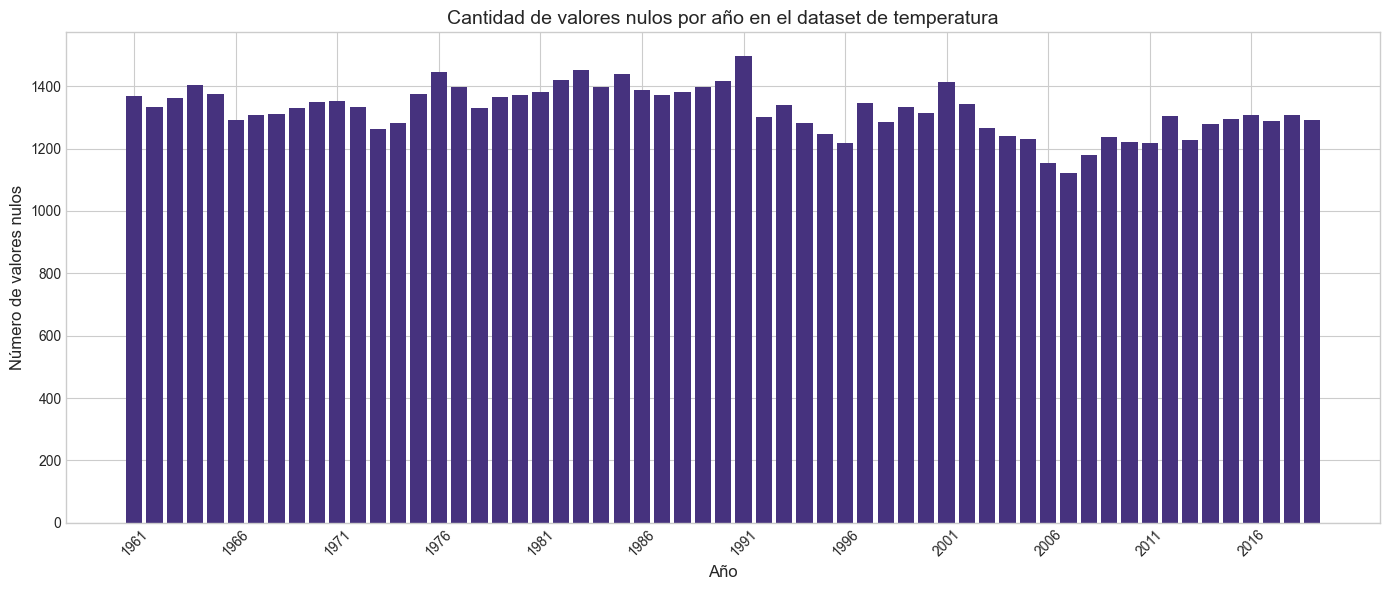

In [10]:

import pandas as pd
import matplotlib.pyplot as plt

# ==========================
# 1. Cargar el dataset
# ==========================
temp_path = '../../data/fuentes/climaticos/Environment_Temperature_change_E_All_Data_NOFLAG.csv'
df_temp = pd.read_csv(temp_path, encoding='latin-1')

# ==========================
# 2. Identificar columnas de años
# ==========================
year_cols = [col for col in df_temp.columns if col.startswith("Y")]

# ==========================
# 3. Calcular nulos totales por año
# ==========================
nulos_por_anio = df_temp[year_cols].isna().sum()

# ==========================
# 4. Graficar
# ==========================
plt.figure(figsize=(14,6))
plt.bar(nulos_por_anio.index.str.replace("Y", ""), nulos_por_anio.values)

# Ajustar ticks cada 5 años
ticks = nulos_por_anio.index.str.replace("Y", "")[::5]  # cada 5 columnas
plt.xticks(ticks, rotation=45)

plt.title("Cantidad de valores nulos por año en el dataset de temperatura")
plt.xlabel("Año")
plt.ylabel("Número de valores nulos")
plt.tight_layout()
plt.show()


Nulos de temperatura por contienete 

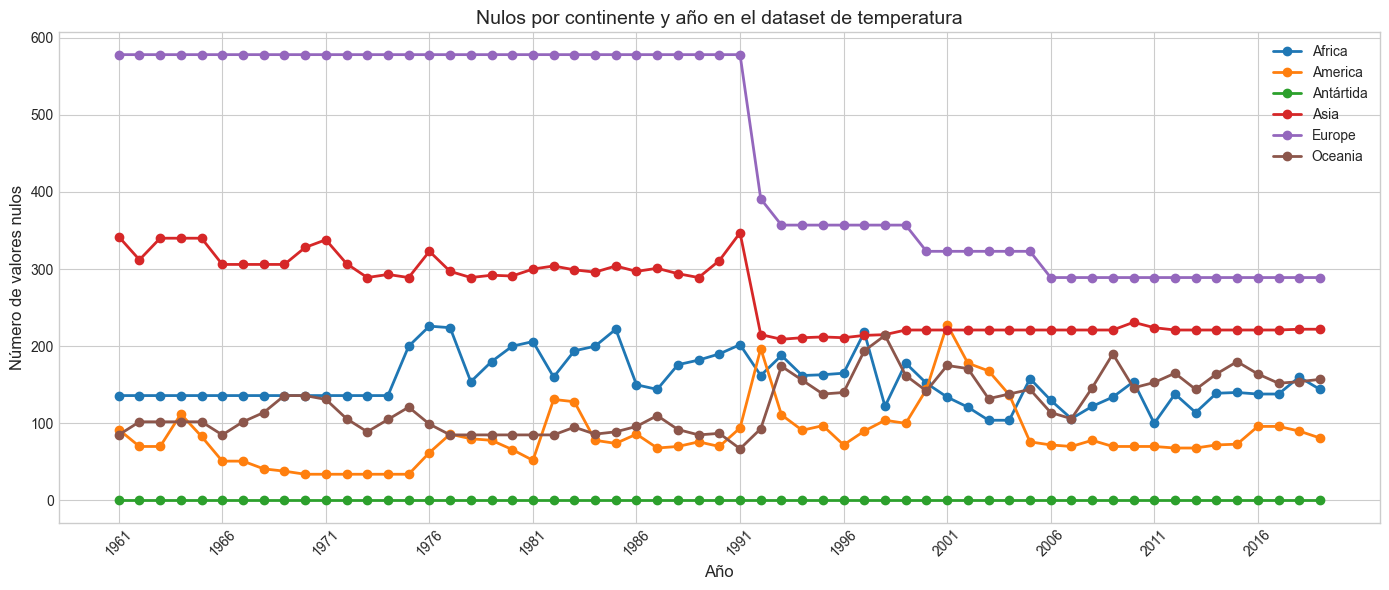

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import pycountry_convert as pc

# ==========================
# 1. Cargar dataset
# ==========================
temp_path = '../../data/fuentes/climaticos/Environment_Temperature_change_E_All_Data_NOFLAG.csv'
df_temp = pd.read_csv(temp_path, encoding='latin-1')

# ==========================
# 2. Identificar columnas de años
# ==========================
year_cols = [col for col in df_temp.columns if col.startswith("Y")]

# ==========================
# 3. Función para mapear país a continente (con Antártida incluida)
# ==========================
def country_to_continent(country_name):
    # Caso especial: Antártida
    if country_name.strip().lower() in ["antarctica", "antártida"]:
        return "Antártida"
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent = pc.convert_continent_code_to_continent_name(continent_code)
        # Unir Norte y Sudamérica como "América"
        if continent in ["North America", "South America"]:
            return "America"
        return continent
    except:
        return None  # si no encuentra el país, lo descartamos

# ==========================
# 4. Agregar columna de continente
# ==========================
df_temp["Continent"] = df_temp["Area"].apply(country_to_continent)

# Quitar filas sin continente reconocido
df_temp = df_temp.dropna(subset=["Continent"])

# ==========================
# 5. Calcular nulos por continente y año
# ==========================
nulos_continente_anio = (
    df_temp.groupby("Continent")[year_cols]
    .apply(lambda x: x.isna().sum())
    .T  # transponer para que los años sean filas
)

# ==========================
# 6. Graficar con colores diferenciados
# ==========================
plt.figure(figsize=(14,6))
colors = plt.cm.tab10.colors  # paleta de 10 colores muy contrastantes

for i, cont in enumerate(nulos_continente_anio.columns):
    plt.plot(
        nulos_continente_anio.index.str.replace("Y", ""), 
        nulos_continente_anio[cont], 
        label=cont, 
        color=colors[i % len(colors)], 
        linewidth=2,
        marker="o"  # añadir marcadores para diferenciar mejor
    )

plt.xticks(nulos_continente_anio.index.str.replace("Y", "")[::5], rotation=45)  # cada 5 años
plt.title("Nulos por continente y año en el dataset de temperatura")
plt.xlabel("Año")
plt.ylabel("Número de valores nulos")
plt.legend()
plt.tight_layout()
plt.show()


LIMPIEZA DATOS EMISIONES

In [4]:
# Limpieza del dataset de emisiones de CO₂ (EDGAR)
print("Limpieza del dataset de emisiones de CO₂ (EDGAR):")
print(f"Filas antes de la limpieza: {df_co2.shape[0]}")

# Identificar las columnas de años (asumiendo que son numéricas)
year_columns = [col for col in df_co2.columns if str(col).replace('.', '').isdigit()]
print(f"Columnas de años encontradas: {len(year_columns)} columnas desde {min(year_columns) if year_columns else 'N/A'} hasta {max(year_columns) if year_columns else 'N/A'}")

# Transformar de formato ancho a formato largo
id_vars = [col for col in df_co2.columns if col not in year_columns]
print(f"Columnas de identificación: {id_vars}")

df_co2_long = pd.melt(
    df_co2,
    id_vars=id_vars,
    value_vars=year_columns,
    var_name='anio',
    value_name='emisiones_co2'
)

# Convertir año a entero
df_co2_long['anio'] = pd.to_numeric(df_co2_long['anio'], errors='coerce')

# Convertir emisiones a numérico
df_co2_long['emisiones_co2'] = pd.to_numeric(df_co2_long['emisiones_co2'], errors='coerce')

# Eliminar filas con valores nulos en emisiones o años
df_co2_clean = df_co2_long.dropna(subset=['emisiones_co2', 'anio'])
print(f"Filas después de eliminar valores nulos: {df_co2_clean.shape[0]}")

# Renombrar la columna de país si existe
country_col = None
for col in df_co2_clean.columns:
    if 'country' in col.lower() or 'pais' in col.lower():
        country_col = col
        break

if country_col:
    df_co2_clean = df_co2_clean.rename(columns={country_col: 'pais'})
else:
    # Si no hay columna de país, usar la primera columna de identificación
    df_co2_clean = df_co2_clean.rename(columns={id_vars[0]: 'pais'})

# Actualizar df_co2 para el resto del análisis
df_co2 = df_co2_clean.copy()

# Mostrar el dataset limpio
print("\nDataset de emisiones de CO₂ limpio:")
display(df_co2.head())
print(f"\nRango de años: {df_co2['anio'].min()} - {df_co2['anio'].max()}")
print(f"Número de países: {df_co2['pais'].nunique()}")

Limpieza del dataset de emisiones de CO₂ (EDGAR):
Filas antes de la limpieza: 214
Columnas de años encontradas: 54 columnas desde 1970 hasta 2023
Columnas de identificación: ['EDGAR Country Code', 'Country']
Filas después de eliminar valores nulos: 11448

Dataset de emisiones de CO₂ limpio:


,pais,Country,anio,emisiones_co2
0,ABW,Aruba,1970,0.036713
1,AFG,Afghanistan,1970,15.437430
2,AGO,Angola,1970,18.998763
3,AIA,Anguilla,1970,0.003355
4,AIR,International Aviation,1970,172.478021



Rango de años: 1970 - 2023
Número de países: 212


LIMPIEZA DATOS TEMPERATURAS

In [5]:
# Limpieza del dataset de temperatura
print("Limpieza del dataset de temperatura:")
print(f"Filas antes de la limpieza: {df_temp.shape[0]}")

# Seleccionar solo las filas que contienen datos de temperatura (no desviación estándar)
df_temp_clean = df_temp[df_temp['Element'] == 'Temperature change']
print(f"Filas después de filtrar solo datos de temperatura: {df_temp_clean.shape[0]}")

# Eliminar duplicados si existen
df_temp_clean = df_temp_clean.drop_duplicates()
print(f"Filas después de eliminar duplicados: {df_temp_clean.shape[0]}")

# Renombrar columnas para mayor claridad
df_temp_clean = df_temp_clean.rename(columns={
    'Area': 'pais',
    'Area Code': 'codigo_pais',
    'Months': 'mes',
    'Months Code': 'codigo_mes',
    'Element': 'elemento',
    'Unit': 'unidad'
})

# Mostrar el dataset limpio
print("\nDataset de temperatura limpio:")
display(df_temp_clean.head())

Limpieza del dataset de temperatura:
Filas antes de la limpieza: 9656
Filas después de filtrar solo datos de temperatura: 4828
Filas después de eliminar duplicados: 4828

Dataset de temperatura limpio:


,codigo_pais,pais,codigo_mes,mes,Element Code,elemento,unidad,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,2,Afghanistan,7004,April,7271,Temperature change,°C,-1.709,0.117,0.919,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,2,Afghanistan,7005,May,7271,Temperature change,°C,1.412,-0.092,-0.690,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


ANALISIS EMISIONES 

Estadísticas descriptivas de emisiones de CO₂:


count    11448.000000
mean       370.631338
std       2719.914585
min          0.003355
25%          2.958491
50%         22.106349
75%         88.058997
max      52962.900859
Name: emisiones_co2, dtype: float64


Rango de años disponibles: 1970 - 2023
Número de países en el dataset: 212


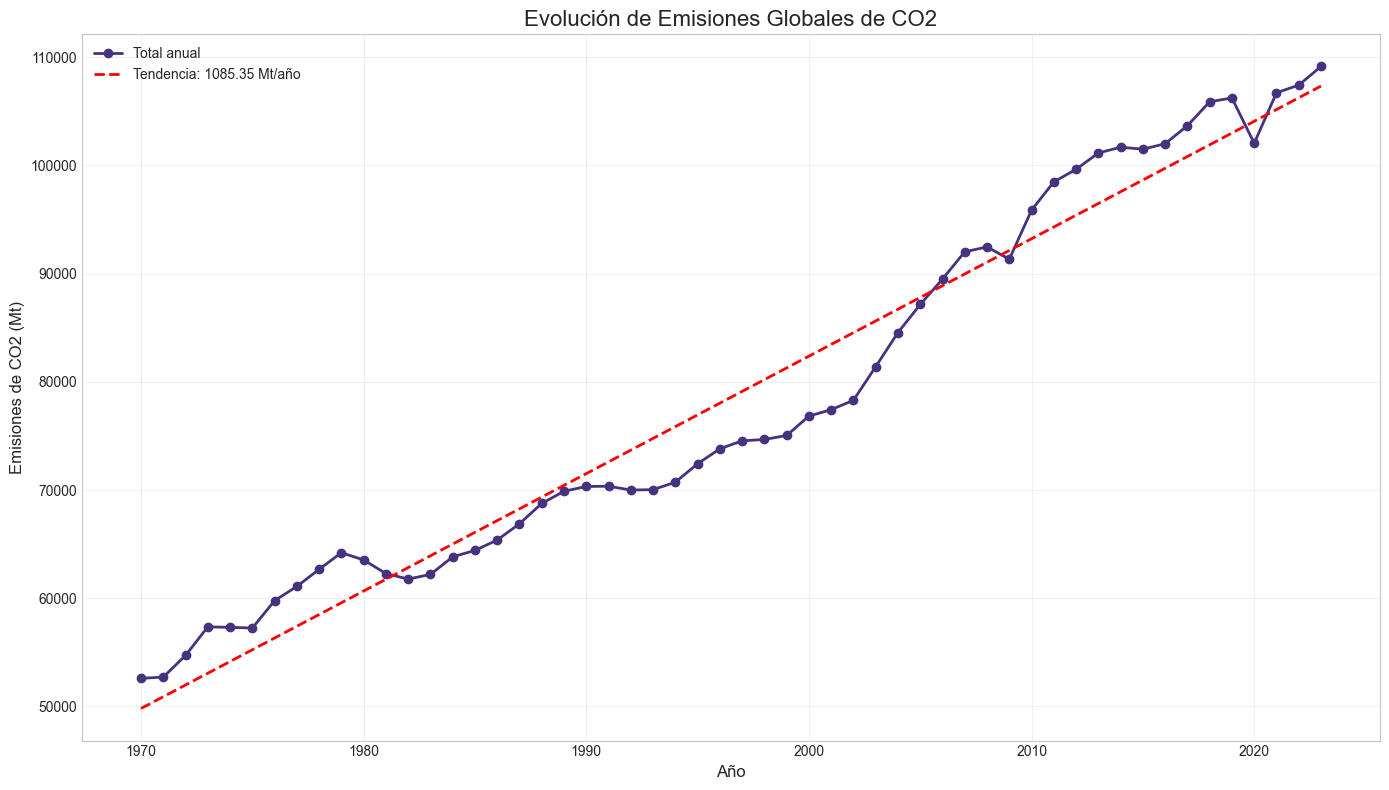

In [6]:
# Estadísticas descriptivas de emisiones de CO₂
print("Estadísticas descriptivas de emisiones de CO₂:")
display(df_co2['emisiones_co2'].describe())

# Rango de años disponibles
print(f"\nRango de años disponibles: {df_co2['anio'].min()} - {df_co2['anio'].max()}")

# Número de países en el dataset
num_paises = df_co2['pais'].nunique()
print(f"Número de países en el dataset: {num_paises}")

# Calcular emisiones globales por año
emisiones_globales = (
    df_co2
      .groupby('anio')['emisiones_co2']
      .sum()
      .reset_index()
)

# Ajuste de tendencia lineal
x = emisiones_globales['anio'].values
y = emisiones_globales['emisiones_co2'].values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Gráfico de evolución global
plt.figure(figsize=(14, 8))
plt.plot(x, y, marker='o', linewidth=2, label='Total anual')
plt.plot(x, p(x), 'r--', linewidth=2,
         label=f'Tendencia: {z[0]:.2f} Mt/año')
plt.title('Evolución de Emisiones Globales de CO2', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Emisiones de CO2 (Mt)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

ANALISIS TEMPERATURAS

Filas después de eliminar valores nulos: 254761

Dataset de temperatura transformado:


,codigo_pais,pais,codigo_mes,mes,elemento,unidad,anio,temperatura
0,2,Afghanistan,7001,January,Temperature change,°C,1961,0.777
1,2,Afghanistan,7002,February,Temperature change,°C,1961,-1.743
2,2,Afghanistan,7003,March,Temperature change,°C,1961,0.516
3,2,Afghanistan,7004,April,Temperature change,°C,1961,-1.709
4,2,Afghanistan,7005,May,Temperature change,°C,1961,1.412


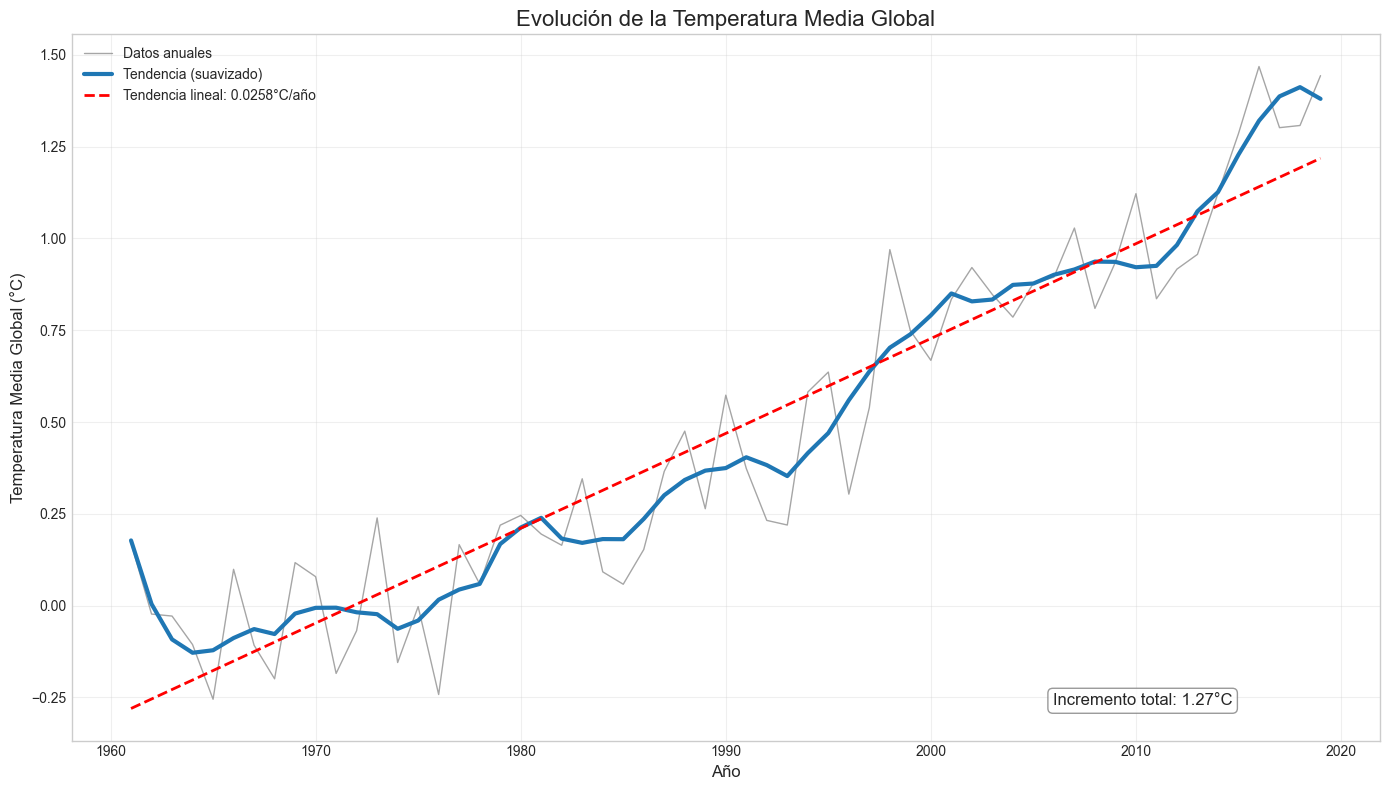

In [7]:

# Transformar el dataset de temperatura de formato ancho a formato largo
# Identificar las columnas de años (que comienzan con 'Y')
year_columns = [col for col in df_temp_clean.columns if col.startswith('Y')]

# Transformar a formato largo
df_temp_long = pd.melt(
    df_temp_clean,
    id_vars=['codigo_pais', 'pais', 'codigo_mes', 'mes', 'elemento', 'unidad'],
    value_vars=year_columns,
    var_name='anio',
    value_name='temperatura'
)

# Convertir año a formato numérico (eliminar el prefijo 'Y')
df_temp_long['anio'] = df_temp_long['anio'].str.replace('Y', '').astype(int)

# Eliminar filas con valores nulos de temperatura
df_temp_long = df_temp_long.dropna(subset=['temperatura'])
print(f"Filas después de eliminar valores nulos: {df_temp_long.shape[0]}")

# Mostrar el dataset transformado
print("\nDataset de temperatura transformado:")
display(df_temp_long.head())
# Filtrar datos para el análisis global (usando datos anuales)
df_temp_annual = df_temp_long[df_temp_long['mes'] == 'Meteorological year']

# Calcular la temperatura media global por año
temp_global = df_temp_annual.groupby('anio')['temperatura'].mean().reset_index()

# Crear gráfico de tendencia global
plt.figure(figsize=(14, 8))

# Graficar datos originales
sns.lineplot(data=temp_global, x='anio', y='temperatura', linewidth=1, alpha=0.7, color='gray', label='Datos anuales')

# Aplicar suavizado para visualizar tendencia
if len(temp_global) > 11:
    temp_global['temperatura_suavizada'] = savgol_filter(temp_global['temperatura'], 11, 3)
    sns.lineplot(data=temp_global, x='anio', y='temperatura_suavizada', linewidth=3, color='#1f77b4', label='Tendencia (suavizado)')

# Añadir línea de tendencia lineal
x = temp_global['anio']
y = temp_global['temperatura']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", linewidth=2, label=f'Tendencia lineal: {z[0]:.4f}°C/año')

# Calcular y mostrar el incremento total
temp_inicial = temp_global.loc[temp_global['anio'] == temp_global['anio'].min(), 'temperatura'].values[0]
temp_final = temp_global.loc[temp_global['anio'] == temp_global['anio'].max(), 'temperatura'].values[0]
incremento_total = temp_final - temp_inicial

# Añadir anotación con incremento total
plt.annotate(f'Incremento total: {incremento_total:.2f}°C', 
            xy=(0.75, 0.05), 
            xycoords='axes fraction',
            fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.xlabel('Año')
plt.ylabel('Temperatura Media Global (°C)')
plt.title('Evolución de la Temperatura Media Global', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()